# Quantitative methods p. 3 - basic information theory measures

Today we are going to present some basic information theory concepts and their use in social media analyzes.

## Entropy

The concept of information entropy was introduced by Claude Shannon in 1948. The entropy is basically the measure of "uncertainty" or "surprise". For a random variable $X$ the entropy is defined as:

$$
H(X) = -\sum_x p(x)\log(p(x))
$$

where the summation is over the variable's possible values. The choice of logarithmic base in the following formulae determines the unit of information entropy that is used. A common unit of information is the bit, based on the binary logarithm. Other units include the nat, which is based on the natural logarithm, and the decimal digit, which is based on the common logarithm. 

For better understanding let's consider a few examples. Let's consider tosses of two coins: honest (probabilities of head and tail are equal) and cheated (probability of head is 0.75 and of tail 0.25). In the first case, before toss, we **cannot** expect that occuring of any side is prefered, although in the latter, we **can** expect that the result will be head (the probability is higher). Therefore our "surprise" about the result of toss is higher in the first case - action of tossing delivers us more information than in the latter case. We can say that the random variable related to the first coin has higher entropy than the second. Indeed:

$$
H(X_{honest}) = - \frac{1}{2} \log \frac{1}{2} - \frac{1}{2} \log \frac{1}{2} = 1
$$

$$
H(X_{cheated}) = - \frac{1}{4} \log \frac{1}{4} - \frac{3}{4} \log \frac{3}{4} \approx 0.811278
$$

Now let's consider third coin with head on both sides. Then the result of coint toss is certain. There is no surprise about the result. In this case the entropy is equal to 0.

From this example we see some of properties of the information entropy. Its value is minimal (equal to 0 - entropy cannot be negatiwe) for certain events and maximal (equal to $N$ - number of all events) for uniform distribution.

In terms of NLP we can consider an entropy of language which can measure information content of each token (letter/word). 

In [136]:
import pandas as pd
import numpy as np

wiki_files = ["angela_merkel", "cicero", "thermopylae", "waterloo"]
tweet_files = ["BorisJohnson", "elonmusk", "Pontifex", "vonderleyen"]

In [137]:
wiki_data = {}
for name in wiki_files:
    with open(f"data_scraped/{name}_text-clean.txt") as file:
        wiki_data[name] = file.read()

In [138]:
from nltk.tokenize import sent_tokenize
import string
import re

wiki_sentences = {}
for name in wiki_files:
    wiki_sentences[name] = []
    tokens = sent_tokenize(wiki_data[name].replace('.', ' . '))
    for token in tokens:
        token = token.replace("\n", '')
        token = re.sub(re.compile('|\\'.join(list(string.punctuation))), '', token)
        wiki_sentences[name].append(token.lower()) 

In [139]:
max_length = np.max([len(s.split()) for name in wiki_files for s in wiki_sentences[name]])
wiki_position_words = {}
for i in range(1, max_length + 1):
    wiki_position_words[i] = []
    for name in wiki_files:
        for sentence in wiki_sentences[name]:
            try:
                wiki_position_words[i].append(sentence.split()[i-1])
            except IndexError:
                pass

In [143]:
def compute_distribution(words):
    _, counts = np.unique(words, return_counts=True)
    return counts / counts.sum()

def compute_entropy(distribution):
    return - np.sum(distribution * np.log2(distribution, where=distribution!=0))

In [144]:
wiki_entropy = []
max_length = np.max([len(s.split()) for name in wiki_files for s in wiki_sentences[name]])
for i in range(1, max_length + 1):
    wiki_entropy.append(compute_entropy(compute_distribution(wiki_position_words[i])))

In [77]:
tweet_data = {}
for name in tweet_files:
    tweet_data[name] = pd.read_csv(f"data_scraped/{name}_2022-04-01_2022-04-30.csv")

In [184]:
tweet_sentences = {}
for name in tweet_files:
    tweet_sentences[name] = []
    tweets = list(tweet_data[name].Embedded_text.map(lambda x: x.split("\n")[:-3]))
    for tweet in [' '.join(tweet) for tweet in tweets]:
        sentences = sent_tokenize(tweet)
        for sentence in sentences:
            if len(sentence.split(' ')) > 1:
                sentence = sentence.replace("\n", '')
                sentence = sentence.replace("\r", '')
                sentence = re.sub(re.compile('|\\'.join(list(string.punctuation))), '', sentence)
                tweet_sentences[name].append(sentence)

In [187]:
max_length = np.max([len(s.split()) for name in tweet_files for s in tweet_sentences[name]])
tweet_position_words = {}
for i in range(1, max_length + 1):
    tweet_position_words[i] = []
    for name in tweet_files:
        for sentence in tweet_sentences[name]:
            try:
                tweet_position_words[i].append(sentence.split()[i-1])
            except IndexError:
                pass

In [189]:
tweet_entropy = []
max_length = np.max([len(s.split()) for name in tweet_files for s in tweet_sentences[name]])
for i in range(1, max_length + 1):
    tweet_entropy.append(compute_entropy(compute_distribution(tweet_position_words[i])))

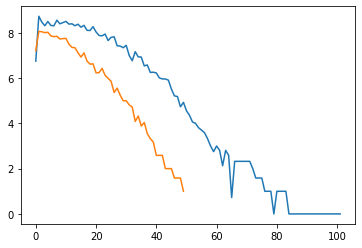

In [196]:
plt.plot(wiki_entropy)
plt.plot(tweet_entropy)

## Mutual information

The mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" obtained about one random variable by observing the other random variable. The quantity was defined and analyzed by Claude Shannon in his landmark paper "A Mathematical Theory of Communication", although he did not call it "mutual information". Mutual Information is also known as information gain. The relation between entropy and mutual information can be represented graphically on Venn diagram:
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy-mutual-information-relative-entropy-relation-diagram.svg)